# Tutorial spaCy

spaCy es una librería que da soporte a multitud de tareas habituales en NLP, y tiene soporte para las siguientes funcionalidades


| NOMBRE | DESCRIPCIÓN |
|:------:|:-----------|
| Tokenización | Segmentación de texto en palabras, signos de puntuación, etc. |
| Part-of-Speech (POS) | Etiquetado de tipos de palabras a tokens, como verbo o sustantivo. |
| Análisis de dependencia | Asignación de etiquetas de dependencia sintáctica, que describen las relaciones entre tokens individuales, como sujeto u objeto. |
| Lematización | Asignación de las formas básicas de las palabras. Por ejemplo, el lema de "was" es "be", y el lema de "rats" es "rat". |
| Detección de límites de oraciones (SBD) | Encontrar y segmentar oraciones individuales. |
| Reconocimiento de entidad nombrada (NER) | Etiquetar objetos del "mundo real" con nombre, como personas, empresas o ubicaciones. |
| Entity Linking (EL) | Desambiguación de entidades textuales a identificadores únicos en una base de conocimientos. |
| Semejanza | Comparar palabras, extensiones de texto y documentos y valoraciones de semejanza |
| Clasificación de texto | Asignación de categorías o etiquetas a un documento completo o partes de un documento. |
| Coincidencia basada en reglas | Encontrar secuencias de tokens en función de sus textos y anotaciones lingüísticas, similares a las expresiones regulares. |
| Entrenamiento | Actualización y mejora de las predicciones de un modelo estadístico. |
| Serialización | Guardar objetos en archivos o cadenas de bytes. |

## Instalación

In [1]:
!pip install spacy

Si queremos ejecutar spaCy con gpu entonces ejecutamos lo siguiente

In [2]:
import spacy
spacy.prefer_gpu()

True

## Idiomas

Actualmente spaCy tiene soporte para múltiples idiomas

| LANGUAGE | CODE |
|:--------:|:--------:|
| Chinese | zh | 
| Danish | da |
| Dutch | nl |
| English | en |
| French | fr |
| German | de |
| Greek | el |
| Italian | it |
| Japanese | ja |
| Lithuanian | lt |
| Multi-language | xx |
| Norwegian Bokmål | nb |
| Polish | pl |
| Portuguese | pt |
| Romanian | ro |
| Spanish | es |
| Afrikaans | af |
| Albanian | sq |
| Arabic | ar |
| Armenian | hy |
| Basque | eu |
| Bengali | bn |
| Bulgarian | bg |
| Catalan | ca |
| Croatian | hr |
| Czech | cs |
| Estonian | et |
| Finnish | fi |
| Gujarati | gu |
| Hebrew | he |
| Hindi | hi |
| Hungarian | hu |
| Icelandic | is |
| Indonesian | id |
| Irish | ga |
| Kannada | kn |
| Korean | ko |
| Latvian | lv |
| Ligurian | lij |
| Luxembourgish | lb |
| Macedonian | mk |
| Malayalam | ml |
| Marathi | mr |
| Nepali | ne |
| Persian | fa |
| Russian | ru |
| Serbian | sr |
| Sinhala | si |
| Slovak | sk |
| Slovenian | sl |
| Swedish | sv |
| Tagalog | tl |
| Tamil | ta |
| Tatar | tt |
| Telugu | te |
| Thai | th |
| Turkish | tr |
| Ukrainian | uk |
| Urdu | ur |
| Vietnamese | vi |
| Yoruba | yo |

Podemos cargar cualquier idioma mediante el siguiente comando

In [4]:
!python -m spacy download es

     |████████████████████████████████| 16.2 MB 28.5 MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-py3-none-any.whl size=16172933 sha256=8f10d2c6c6e68253ff51635795ded68147d86ac0175a8da864f6852ee60515ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-r58xfzph/wheels/21/8d/a9/6c1a2809c55dd22cd9644ae503a52ba6206b04aa57ba83a3d8
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')


Y podemos instanciar un modelo en cualquier idioma cargandolo de la siguiente manera

In [8]:
es_nlp = spacy.load('es')

Podemos ver información de cualquier paquete instalado mediante el siguiente comando

In [35]:
!python -m spacy info en_core_web_sm


===================== Info about model 'en_core_web_sm' =====================

lang             en                            
name             core_web_sm                   
license          MIT                           
author           Explosion                     
url              https://explosion.ai          
email            contact@explosion.ai          
description      English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.
sources          [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}]
pipeline         ['tagger', 'parser', 'ner']   
version          2.2.5                         
spacy_version    >=2.2.2                       
parent_package   spacy                         
labels           {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS

Y podemos ver los paquetes de idiomas disponibles con el siguiente comando

In [36]:
!python -m spacy validate

✔ Loaded compatibility table

====================== Installed models (spaCy v2.2.4) ======================
ℹ spaCy installation: /usr/local/lib/python3.7/dist-packages/spacy

TYPE      NAME              MODEL             VERSION                            
package   es-core-news-sm   es_core_news_sm   2.2.5   ✔
package   en-core-web-sm    en_core_web_sm    2.2.5   ✔
link      en                en_core_web_sm    2.2.5   ✔
link      es                es_core_news_sm   2.2.5   ✔



## Arquitectura de spaCy

### Estructuras de datos

Las principales estructuras de datos son:
- **Doc:** Es una de las estructuras mñas importante y almacena la secuencia de tokens y todas sus anotaciones
- **Vocab:** Posee un conjunto de tablas de consulta que hacen que la información común esté disponible en todos los documentos.

In [13]:
doc = es_nlp("Este es mi primer ejemplo") # Uso del modelo, para convertir el corpus en un objeto tipo doc
print('El tipo de datos de doc es: ',type(doc))
print('El token en la posicion 4 es: ',doc[4])
print(es_nlp.vocab.length)

El tipo de datos de doc es:  <class 'spacy.tokens.doc.Doc'>
El token en la posicion 4 es:  ejemplo
231


Podemos ver información de cualquier paquete mediante el siguiente comando

In [33]:
!python -m spacy info en_core_web_sm


===================== Info about model 'en_core_web_sm' =====================

lang             en                            
name             core_web_sm                   
license          MIT                           
author           Explosion                     
url              https://explosion.ai          
email            contact@explosion.ai          
description      English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.
sources          [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}]
pipeline         ['tagger', 'parser', 'ner']   
version          2.2.5                         
spacy_version    >=2.2.2                       
parent_package   spacy                         
labels           {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS

Hay multiples funciones de alto nivel que se usaran frecuentemente entre ellas:

- **spacy.load():** Permite cargar un modelo descargado y retorna una instancia del modelo

In [47]:
spacy.load('es')

- **spacy.blank():** Crea un modelo en blanco, para un idioma determinado

In [40]:
spacy.blank('es')

- **spacy.info():**  Proporciona información de los modelos disponibles

In [53]:
import markdown
spacy.info("en", markdown=True) # Información de el modelo en lenguaje español, en sintaxis markdown


## Info about model 'en'

* **lang:** en
* **name:** core_web_sm
* **license:** MIT
* **author:** Explosion
* **url:** https://explosion.ai
* **email:** contact@explosion.ai
* **description:** English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.
* **sources:** [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}]
* **pipeline:** ['tagger', 'parser', 'ner']
* **version:** 2.2.5
* **spacy_version:** >=2.2.2
* **parent_package:** spacy
* **labels:** {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'XX', '_SP', '``'], 'parser': ['ROOT', 'acl', 'acomp', 'advcl', 'advmod', 

{'accuracy': {'ents_f': 85.5515654809,
  'ents_p': 85.8937524646,
  'ents_r': 85.212094115,
  'las': 89.7130416495,
  'tags_acc': 97.0493515238,
  'token_acc': 99.7579930934,
  'uas': 91.6218131967},
 'author': 'Explosion',
 'description': 'English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.',
 'email': 'contact@explosion.ai',
 'labels': {'ner': ['CARDINAL',
   'DATE',
   'EVENT',
   'FAC',
   'GPE',
   'LANGUAGE',
   'LAW',
   'LOC',
   'MONEY',
   'NORP',
   'ORDINAL',
   'ORG',
   'PERCENT',
   'PERSON',
   'PRODUCT',
   'QUANTITY',
   'TIME',
   'WORK_OF_ART'],
  'parser': ['ROOT',
   'acl',
   'acomp',
   'advcl',
   'advmod',
   'agent',
   'amod',
   'appos',
   'attr',
   'aux',
   'auxpass',
   'case',
   'cc',
   'ccomp',
   'compound',
   'conj',
   'csubj',
   'csubjpass',
   'dative',
   'dep',
   'det',
   'dobj',
   'expl',
   'intj',
   'mark',
   'meta',
   'neg',
   'nmod',
   'npadvmod',


- **spacy.explain:** Da una descripcion en lso siguientes casos:
  - Etiquetas PoS
  - Etiquetas de dependencias
  - Tipos de entidades

In [64]:
import spacy
import en_core_web_sm
nlp= en_core_web_sm.load()
spacy.explain("NORP")
doc = nlp("This is my first example")
for word in doc:
 print(f'Palabra: {word.text}\tTag: {word.tag_},\tExplicación del tag "{word.tag_}": {spacy.explain(word.tag_)}')


Palabra: This	Tag: DT,	Explicación del tag "DT": determiner
Palabra: is	Tag: VBZ,	Explicación del tag "VBZ": verb, 3rd person singular present
Palabra: my	Tag: PRP$,	Explicación del tag "PRP$": pronoun, possessive
Palabra: first	Tag: JJ,	Explicación del tag "JJ": adjective
Palabra: example	Tag: NN,	Explicación del tag "NN": noun, singular or mass


- **spacy.prefer_gpu():** Indicamos que preferimos usar GPU, si retorna True, es que sera usada la GPU, si retorna False, es por que no ha podido usar la GPU

In [66]:
import spacy
activated = spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")
print('Activada GPU:',activated)

Activada GPU True


- **spacy.require_gpu():** Indicamos que necesitamos usar GPU, es parecida a la anterior pero retornara una excepción si no es posible usar GPU

In [67]:
import spacy
spacy.require_gpu()
nlp = spacy.load("en_core_web_sm")

## Tokenización

spaCy al procesar un texto y convertirlo a un docuemto, lo primero que hace es tokenizarlo, es decir convertirlo en palabras. Esto lo hace aplicando reglas, que son especificas de cada idioma. Por ejemplo en el texto el signo de puntuación significa una nueva frase, pero en la palabra U.K. no o el carater de $esta unido a el 1, pero nos puede interesar separalos. Cada Doc, contiene tokens individuales, y podemos recorrerlos

In [93]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


In [95]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Let's go to N.Y!")
for token in doc:
    print(token.text)

Let
's
go
to
N.Y
!


### Tokenizadores

Son las clases que permiten dividir el texto en palabras, frases...

Los Tokenizadores de spaCy se encuentran en el paquete tokenizer

Podemos usar cualquiera de ellos, o crear el nuestro propio

In [22]:
from spacy.tokenizer import Tokenizer # Importamos el tokenizador de espacios en blanco
blank_tokenizer = Tokenizer(es_nlp.vocab) # Le pasamos el vocabulario del modelo en el idioma, por lo tanto obtenemos un tokenizador adaptado al idioma
print(blank_tokenizer) # Y ya tenemos el tokenizador

tokens = blank_tokenizer("Este es mi primer ejemplo") # Si pasamos el texto a el tokenizador, obtenemos los tokens
for i,token in enumerate(tokens):
    print(i,token,end='\n')

0 Este
1 es
2 mi
3 primer
4 ejemplo


## Anotaciones linguisticas

spaCy contiene multiples anotaciones linguisticas, para inferir la estructura gramatical

Podemos usar las siguentes funciones para obtener información de los tokens:
- **token.text:** El texto o token, o sea la palabra en formato texto
- **token.lemma_:** La palabra raiz de la que procede, sin sufijos ni prefijos
- **token.pos_:** La función sintactica
- **token.tag_:** El tipo de palabra
- **token.dep_:** La función sintactica dentro de la oración
- **token.shape_:** La forma de la palabra
- **token.is_alpha:** Indica si es alfanumérico
- **token.is_stop:** Indica si es una Stop Word

In [106]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(f'Palabra: {token.text}\tLemma: {token.lemma_}\tPoS: {token.pos_}\tTag: {token.tag_}\tRelación Sintactica: {token.dep_}\tForma: {token.shape_}\tAlfanumerico: {token.is_alpha}\tStopWord: {token.is_stop}')

Palabra: Apple	Lemma: Apple	PoS: PROPN	Tag: NNP	Relación Sintactica: nsubj	Forma: Xxxxx	Alfanumerico: True	StopWord: False
Palabra: is	Lemma: be	PoS: AUX	Tag: VBZ	Relación Sintactica: aux	Forma: xx	Alfanumerico: True	StopWord: True
Palabra: looking	Lemma: look	PoS: VERB	Tag: VBG	Relación Sintactica: ROOT	Forma: xxxx	Alfanumerico: True	StopWord: False
Palabra: at	Lemma: at	PoS: ADP	Tag: IN	Relación Sintactica: prep	Forma: xx	Alfanumerico: True	StopWord: True
Palabra: buying	Lemma: buy	PoS: VERB	Tag: VBG	Relación Sintactica: pcomp	Forma: xxxx	Alfanumerico: True	StopWord: False
Palabra: U.K.	Lemma: U.K.	PoS: PROPN	Tag: NNP	Relación Sintactica: compound	Forma: X.X.	Alfanumerico: False	StopWord: False
Palabra: startup	Lemma: startup	PoS: NOUN	Tag: NN	Relación Sintactica: dobj	Forma: xxxx	Alfanumerico: True	StopWord: False
Palabra: for	Lemma: for	PoS: ADP	Tag: IN	Relación Sintactica: prep	Forma: xxx	Alfanumerico: True	StopWord: True
Palabra: $	Lemma: $	PoS: SYM	Tag: $	Relación Sintactica: qu

Tambien podemos visualizar el resultado usando **displacy**

In [107]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

## Entidades Nombradas

Permite identificar objetos especificos del mundo real como por ejemplo una persona, un país, un producto o el título de un libro. Como spaCy usa metodos estadísticos, depende de los ejemplos de entrenamiento para identificar entidades

In [111]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(f'Token: {ent.text}\tComienzaEn: {ent.start_char}\tTerminaEn: {ent.end_char}\tEntidad Nombrada: {ent.label_}')

Token: Apple	ComienzaEn: 0	TerminaEn: 5	Entidad Nombrada: ORG
Token: U.K.	ComienzaEn: 27	TerminaEn: 31	Entidad Nombrada: GPE
Token: $1 billion	ComienzaEn: 44	TerminaEn: 54	Entidad Nombrada: MONEY


Tambien tiene utilidades especificas para visualizar las entidades (usando **displacy**)

In [112]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
displacy.render(doc, jupyter=True, style="ent")

## Vectores de palabras y Similaridad

Para que los algoritmos de Machine learning, puedan trabajar con palabras, estas han de transformarse en vectores.

SpaCy hace exactamente eso, y usa modelos entrenados en el idioma, para generar vectores de parabras, que cuando semanticamente son muy parecidas, permiten obtener vectores parecidos

In [ ]:
import spacy
import en_core_web_md
nlp = en_core_web_md.load()

In [128]:
tokens = nlp("dog cat banana afskfsd")
for token in tokens:
    print(f'Token: {token.text}\tTieneVector: {token.has_vector}\tTamañoVector: {len(token.vector)}\tComienzoVector: {token.vector[:3]}...\tVectorNormalizado: {token.vector_norm}\tEs desconocida: {token.is_oov}')

Token: dog	TieneVector: True	TamañoVector: 300	ComienzoVector: [-0.40176   0.37057   0.021281]...	VectorNormalizado: 7.033673286437988	Es desconocida: False
Token: cat	TieneVector: True	TamañoVector: 300	ComienzoVector: [-0.15067  -0.024468 -0.23368 ]...	VectorNormalizado: 6.680818557739258	Es desconocida: False
Token: banana	TieneVector: True	TamañoVector: 300	ComienzoVector: [ 0.20228  -0.076618  0.37032 ]...	VectorNormalizado: 6.700014114379883	Es desconocida: False
Token: afskfsd	TieneVector: False	TamañoVector: 300	ComienzoVector: [0. 0. 0.]...	VectorNormalizado: 0.0	Es desconocida: True


El paquete de idioma que cargemos, y si versión sm -> small, md -> medio y lg -> large, determina el numero de palabras y por lo tanto los el numero de vectores del modelo, por ejemplo el paquete lg en eingles, tiene 685k vectores únicos

### Similaridad

SpaCy, tiene la capadidad de comprobar como son de similares. Cada objeto **Doc, Span, Token, Lexema** tienen el metodo **.similarity**, que permite calcular la similaridad

Por ejemplo

In [130]:
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

# Similarity of two documents
print('\nSimilarity of two documents')
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
token_1 = doc1[2:4] # Token 1 french_fries
token_2 = doc1[5] # Token 2 burgers
# Similarity of two tokens
print('\nSimilarity of two tokens')
print(token_1, "<->", token_2, token_1.similarity(token_2))


Similarity of two documents
I like salty fries and hamburgers. <-> Fast food tastes very good. 0.77994853

Similarity of two tokens
salty fries <-> hamburgers 0.7304624


Hay que tener en cuenta que la similitud es muy subjetiva, y depende del proposito.

## Funciones de visualización

El modulo de visualización para spaCy, esta dentro del paquete **displacy**

Puede usanrse para visalizar un analisis sintáctico

In [82]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("This is the first example with Spacy")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})


Tambien podemos personalizar las opciones

In [83]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("This is the first example with Spacy")
options = {"compact": True, "bg": "#09a3d5",
 "color": "black", "font": "Source Sans Pro"}
displacy.render(doc, style="dep", jupyter=True, options=options)


O usarlo para el reconocimiento de entidades

In [84]:
import spacy
from spacy import displacy
text = """When Sebastian Thrun started working on self-driving cars at Google in
2007, few people outside of the company took him seriously. But Google is
starting from behind. The company made a late push into hardware, and Apple's
Siri has clear leads in consumer adoption."""
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, jupyter=True, style="ent")

In [91]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)


Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP compound X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


## Pipelines

Cuando pasamos un texto a un modelo, realmente se llevann a cabo varias tareas, desde la entrada del texto, hasta la salida del documento

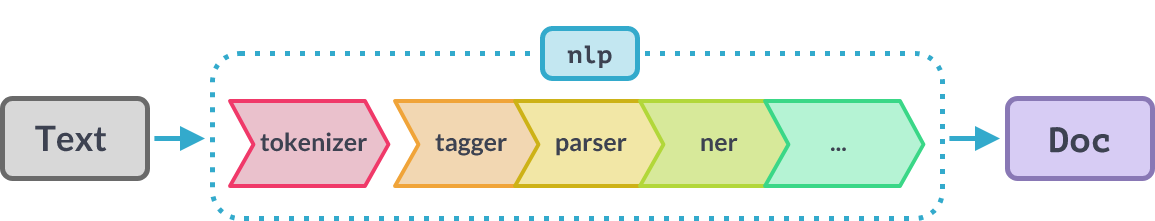

Es posible definir nuestros propios pipelines, pero en este tutorial, no entraremos en ello

## Serialización

Si se hace sualquier modificación de un modelo, es necesario tener mecanismos para poder almacenar y recuperar dichos modelos.

Para ello los objetos Language, Doc, Vocab y String Store, cuentan con metodos para ello

| MÉTODO | RETORNO | USO | EJEMPLO |
|:-------|:--------|:--------|:--------|
| to_bytes | bytes | Convertir un objeto spaCy a binario | data = nlp.to_bytes() |
| from_bytes | objeto |  Convertir un binario a objeto spaCy |nlp.from_bytes(data) |
| to_disk | - |  Guarda un objeto spaCy a disco | nlp.to_disk("/path") |
| from_disk | Objeto spaCy |  Lee un objeto spaCy de disco | 	nlp.from_disk("/path") |

## Entrenamiento

Para entrenar algun modelo es necesario contar con datos de entrenamiento y las etiquetas que queremos predecir

El entrenamiento, es un proceso iterativo donde las predicciones del modelo se comparan con las prediciones reales, y sse ajustan los pesos, de forma que el modelo tienda con cada iteración a mejorar.

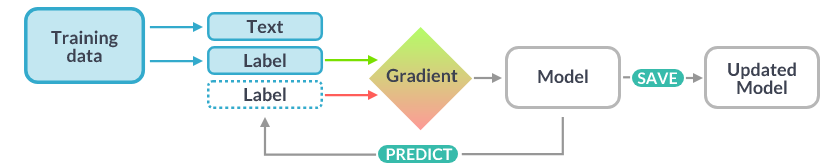

El obejtivo de el entrenamiento es que el modelo aprenda a generalizar, por ejemplo no queremos que unicamente aprenda que Amazon es una empresa, sino que queremos que cuando vea Google, en un contexto similar (sin haberla visto previamente), infiera que probablemente tambien sea una empersa. 

Tambien importa el sesgo en los datos de entrenamiento, es decir que si entrenamos con datos de la Wikipedia, donde habitualmente, no se usa casi nunca la primera persona, el modelo probablemente no funcionara bien cuando lo usemos con Twitter, donde casi todas las frases se expresan en 1º persona.

Por otro lado, no solo necesitaremos datos de entrenamiento, sino tambien de test (datos que el modelo nunca haya visto), para comprobar si nuestro modelo ha sido capaz generalizar, lo aprendido en la fase de entrenamiento.


